In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
salary_data=pd.read_csv('/kaggle/input/salary-data/Salary_Data.csv')
salary_data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [3]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [4]:
salary_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6702.0,33.620859,7.614633,21.0,28.0,32.0,38.0,62.0
Years of Experience,6701.0,8.094687,6.059003,0.0,3.0,7.0,12.0,34.0
Salary,6699.0,115326.964771,52786.183911,350.0,70000.0,115000.0,160000.0,250000.0


In [5]:
print('Total null values of data:',salary_data.isna().sum().sum())
print(salary_data.isna().sum())

Total null values of data: 17
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [6]:
"""""def fill_na(salary_data, columns):
    for col in columns:
        value_counts = salary_data[col].value_counts(normalize=True)
        salary_data[col] = salary_data[col].apply(
            lambda x: np.random.choice(value_counts.index, p=value_counts.values) if pd.isnull(x) else x
        )
    return salary_data

columns_to_fill = ['Gender','Education Level','Job Title']
salary_data = fill_na(salary_data, columns_to_fill)
"""""

'""def fill_na(salary_data, columns):\n    for col in columns:\n        value_counts = salary_data[col].value_counts(normalize=True)\n        salary_data[col] = salary_data[col].apply(\n            lambda x: np.random.choice(value_counts.index, p=value_counts.values) if pd.isnull(x) else x\n        )\n    return salary_data\n\ncolumns_to_fill = [\'Gender\',\'Education Level\',\'Job Title\']\nsalary_data = fill_na(salary_data, columns_to_fill)\n'

In [7]:
salary_data['Age'] = salary_data['Age'].fillna(salary_data['Age'].mean())
salary_data['Years of Experience'] = salary_data['Years of Experience'].fillna(salary_data['Years of Experience'].mean())
salary_data['Salary'] = salary_data['Salary'].fillna(salary_data['Salary'].mean())

In [8]:
salary_data.isna().sum()

Age                    0
Gender                 2
Education Level        3
Job Title              2
Years of Experience    0
Salary                 0
dtype: int64

In [9]:
salary_data.drop_duplicates().reset_index(drop=True)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
1787,43.0,Female,Master's Degree,Digital Marketing Manager,15.0,150000.0
1788,27.0,Male,High School,Sales Manager,2.0,40000.0
1789,33.0,Female,Bachelor's Degree,Director of Marketing,8.0,80000.0
1790,37.0,Male,Bachelor's Degree,Sales Director,7.0,90000.0


In [10]:
salary_data_numeric=salary_data.select_dtypes(exclude=['object'])

In [11]:
import seaborn as sns

<Axes: >

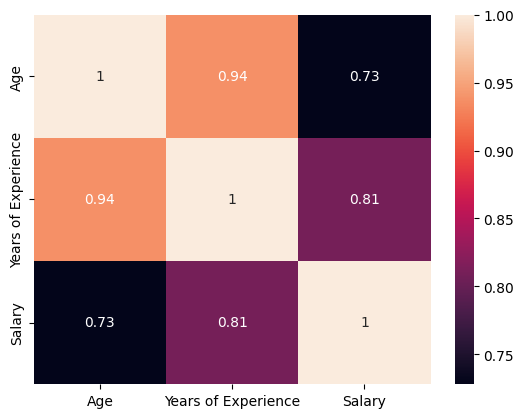

In [12]:
sns.heatmap(salary_data_numeric.corr(),annot=True)

<Axes: >

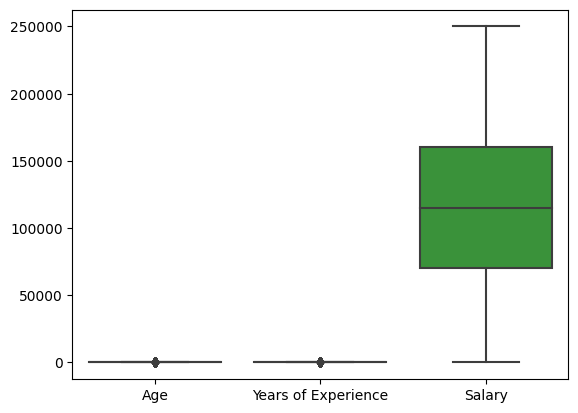

In [13]:
sns.boxplot(data=salary_data_numeric)

In [14]:
salary_data['Education Level']=salary_data['Education Level'].replace('phD','PhD').replace("Master's Degree","Master's")
salary_data_encode=salary_data.drop(['Job Title'],axis=1)

In [15]:
salary_data=pd.get_dummies(salary_data_encode,drop_first=True)
salary_data

,Age,Years of Experience,Salary,Gender_Male,Gender_Other,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's,Education Level_PhD
0,32.0,5.0,90000.0,True,False,False,False,False,False
1,28.0,3.0,65000.0,False,False,False,False,True,False
2,45.0,15.0,150000.0,True,False,False,False,False,True
3,36.0,7.0,60000.0,False,False,False,False,False,False
4,52.0,20.0,200000.0,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
6699,49.0,20.0,200000.0,False,False,False,False,False,True
6700,32.0,3.0,50000.0,True,False,False,True,False,False
6701,30.0,4.0,55000.0,False,False,True,False,False,False
6702,46.0,14.0,140000.0,True,False,False,False,True,False


In [16]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
salary_data_imputed = imputer.fit_transform(salary_data)
salary_data = pd.DataFrame(salary_data_imputed, columns=salary_data.columns)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_standard = scaler.fit_transform(salary_data)
salary_data_scaled=pd.DataFrame(scaled_standard, columns=salary_data.columns)
salary_data_scaled

,Age,Years of Experience,Salary,Gender_Male,Gender_Other,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's,Education Level_PhD
0,-0.212909,-0.510911,-0.480018,0.908138,-0.045746,-0.714794,-0.267603,-0.619892,-0.506564
1,-0.738331,-0.841097,-0.953839,-1.101155,-0.045746,-0.714794,-0.267603,1.613185,-0.506564
2,1.494713,1.140018,0.657152,0.908138,-0.045746,-0.714794,-0.267603,-0.619892,1.974083
3,0.312513,-0.180725,-1.048603,-1.101155,-0.045746,-0.714794,-0.267603,-0.619892,-0.506564
4,2.414201,1.965483,1.604794,0.908138,-0.045746,-0.714794,-0.267603,1.613185,-0.506564
...,...,...,...,...,...,...,...,...,...
6699,2.020135,1.965483,1.604794,-1.101155,-0.045746,-0.714794,-0.267603,-0.619892,1.974083
6700,-0.212909,-0.841097,-1.238131,0.908138,-0.045746,-0.714794,3.736882,-0.619892,-0.506564
6701,-0.475620,-0.676004,-1.143367,-1.101155,-0.045746,1.399004,-0.267603,-0.619892,-0.506564
6702,1.626068,0.974925,0.467624,0.908138,-0.045746,-0.714794,-0.267603,1.613185,-0.506564


In [18]:
#LINEAR REGRESSION

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [20]:
X = salary_data_scaled.drop('Salary',axis=1)
y = salary_data_scaled['Salary'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
model = LinearRegression()

In [21]:
model.fit(X_train,y_train)

LinearRegression()

In [22]:
y_test.shape

(1341, 1)

In [23]:
model.predict(X_test).shape

(1341, 1)

In [24]:
model.score(X_test, y_test) 

0.7584978032256849

In [25]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [26]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.7584978032256849

In [27]:
# DIFFERENCE BETWEEN OTHER MODELS

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [29]:
model1 = LinearRegression()
model2 = SVR()
model3 = DecisionTreeRegressor()

In [30]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

DecisionTreeRegressor()

In [31]:
model1_pred = model1.predict(X_test)
model2_pred = model2.predict(X_test)
model3_pred = model3.predict(X_test)

In [32]:
print(r2_score(y_test, model1_pred))
print(r2_score(y_test, model2_pred))
print(r2_score(y_test, model3_pred))

0.7584978032256849
0.8627286996337773
0.9362047970878156


In [33]:
# APPLY VOTING REGRESSOR

In [34]:
from sklearn.ensemble import VotingRegressor

In [35]:
estimators = [('lr', model1), ('svr', model2), ('dt', model3)]
voting_reg = VotingRegressor(estimators)

In [36]:
voting_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()), ('svr', SVR()),
                            ('dt', DecisionTreeRegressor())])

In [37]:
voting_reg_pred = voting_reg.predict(X_test)

In [38]:
print(r2_score(y_test, voting_reg_pred))

0.8983907745428944


In [39]:
# APPLY XGBOOST REGRESSOR

In [40]:
!pip install xgboost

In [41]:
import xgboost as xg 

In [42]:
xgb_r = xg.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 10, seed = 123)

In [43]:
xgb_r.fit(X_train, y_train) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [44]:
xgb_pred = xgb_r.predict(X_test) 

In [45]:
print(r2_score(y_test, xgb_pred))

0.9143975380938699


In [46]:
# APPLY CATBOOST REGRESSOR

In [47]:
from catboost import CatBoostRegressor
cb_model = CatBoostRegressor(iterations=2,
                          learning_rate=1,
                          depth=2)

In [48]:
cb_model.fit(X_train, y_train)

0:	learn: 0.6405254	total: 53.1ms	remaining: 53.1ms
1:	learn: 0.5789291	total: 54.3ms	remaining: 0us


In [49]:
cb_pred = model.predict(X_test)

In [50]:
print(r2_score(y_test, cb_pred))

0.7584978032256849
